# Curso de CNN con PyTorch

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

## 1) 🎯 ¿Qué es el Pooling?

El **pooling** es una operación que se utiliza para **reducir la dimensionalidad espacial** (alto y ancho) de una imagen o de los mapas de activación.

Esto reduce la cantidad de parámetros y computación en la red, y ayuda a controlar el sobreajuste / overfitting.

## 2) 📐 Fundamento Matemático

Dado un tensor de entrada \( X ∈ ℝ^{H×W} \), el pooling aplica una función (máximo, promedio, etc.) sobre regiones no superpuestas (o con cierto `stride`).

**Max Pooling:**

$$
y_{i,j} = \max_{(m,n) ∈ R_{i,j}} x_{m,n}
$$

**Average Pooling:**

$$
y_{i,j} = \frac{1}{|R_{i,j}|} \sum_{(m,n) ∈ R_{i,j}} x_{m,n}
$$

Donde \( R_{i,j} \) es la región local (como una ventana 2x2) que se "pooliza".

---

In [6]:
import torch
import torch.nn as nn

In [7]:
x = torch.tensor([[[[1,2,3,4],
                    [5,6,7,8],
                    [9,10,11,12],
                    [13,14,15,16]]]], dtype=torch.float)

In [9]:
# MaxPool2d reduce de 4×4 a 2×2
pool = nn.MaxPool2d(2, stride=1)
print(pool(x))

tensor([[[[ 6.,  7.,  8.],
          [10., 11., 12.],
          [14., 15., 16.]]]])


Aclaración:

- Pooling es un downsampling basado en estadísticas locales,
- Resize es un escalado con interpolación.

## 3) 🧪 Ejemplos

### 🧪 3.1) Imagen Gradiente Blanco y Negro

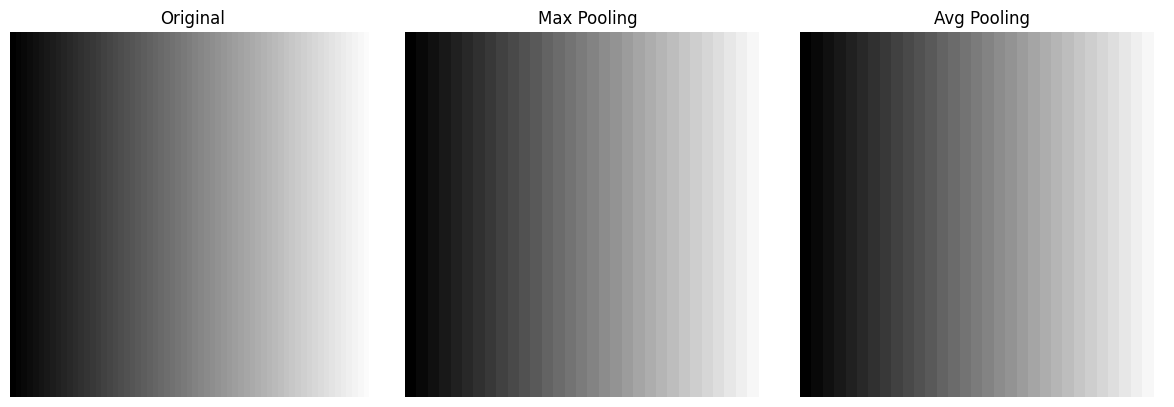

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Imagen gradiente (64x64)
gradient = np.tile(np.linspace(0, 1, 64), (64, 1))
img_gray = torch.tensor(gradient, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1,1,64,64)

# Poolings
pool_max = nn.MaxPool2d(kernel_size=2, stride=2)
pool_avg = nn.AvgPool2d(kernel_size=2, stride=2)

img_max = pool_max(img_gray)
img_avg = pool_avg(img_gray)

# Visualización
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(img_gray.squeeze(), cmap='gray')
axs[0].set_title("Original")

axs[1].imshow(img_max.squeeze(), cmap='gray')
axs[1].set_title("Max Pooling")

axs[2].imshow(img_avg.squeeze(), cmap='gray')
axs[2].set_title("Avg Pooling")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()


### 🧪 3.2) Imagen tipo letra "P"

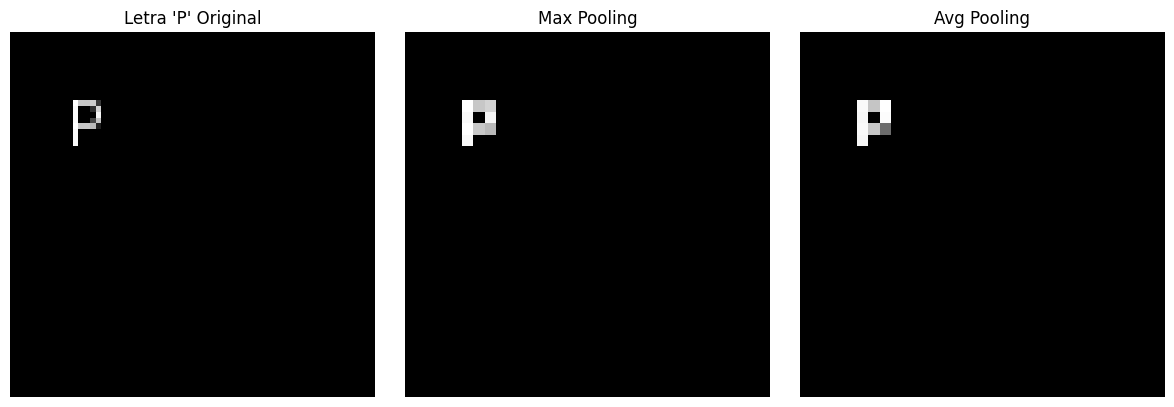

In [11]:
from PIL import Image, ImageDraw

# Crear imagen tipo "P"
img_pil = Image.new("L", (64, 64), color=0)
draw = ImageDraw.Draw(img_pil)
draw.text((10, 10), "P", fill=255)

img_tensor = torch.tensor(np.array(img_pil) / 255.0, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

img_max = pool_max(img_tensor)
img_avg = pool_avg(img_tensor)

# Visualización
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(img_tensor.squeeze(), cmap='gray')
axs[0].set_title("Letra 'P' Original")

axs[1].imshow(img_max.squeeze(), cmap='gray')
axs[1].set_title("Max Pooling")

axs[2].imshow(img_avg.squeeze(), cmap='gray')
axs[2].set_title("Avg Pooling")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()


### 🧪 3.3) Imagen RGB subida por el usuario

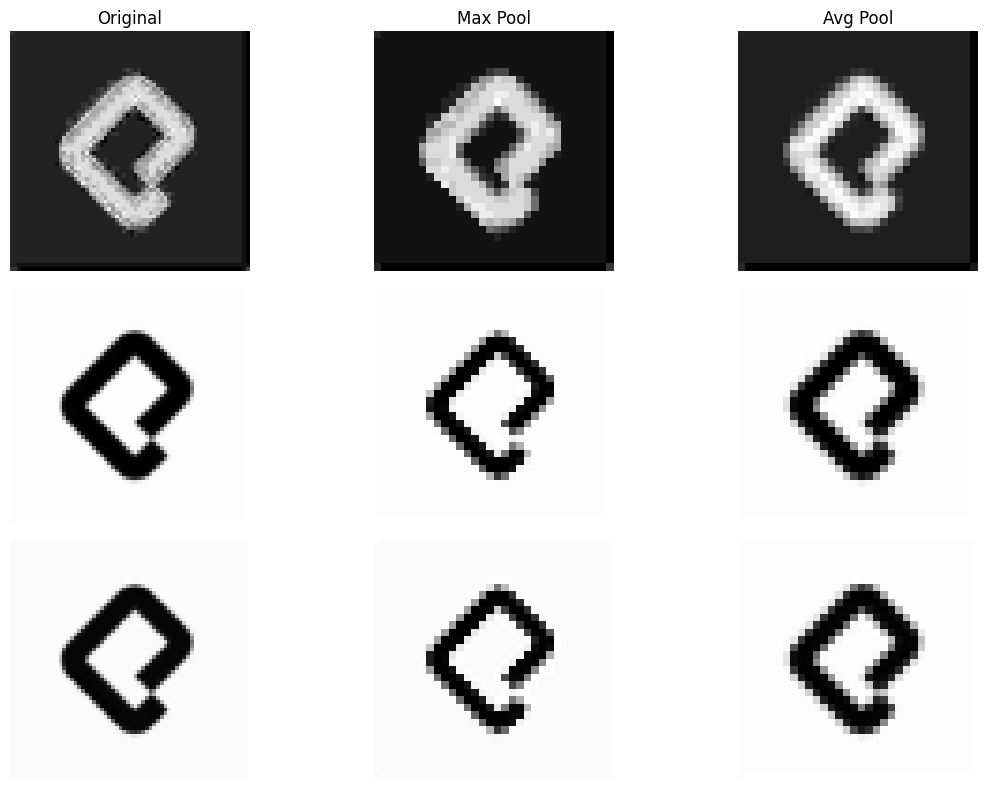

In [12]:
from PIL import Image
import torchvision.transforms as transforms

# Ruta a imagen local
img_path = "/content/logo_platzi.jpg"
img = Image.open(img_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()  # (3, H, W)
])

img_tensor = transform(img).unsqueeze(0)  # (1, 3, 64, 64)

pool_max_rgb = nn.MaxPool2d(2, 2)
pool_avg_rgb = nn.AvgPool2d(2, 2)

img_max = pool_max_rgb(img_tensor)
img_avg = pool_avg_rgb(img_tensor)

# Mostrar los 3 canales como imágenes
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
titles = ["Original", "Max Pool", "Avg Pool"]
for i in range(3):
    axs[i][0].imshow(img_tensor[0][i].numpy(), cmap='gray')
    axs[i][1].imshow(img_max[0][i].detach().numpy(), cmap='gray')
    axs[i][2].imshow(img_avg[0][i].detach().numpy(), cmap='gray')

for j in range(3):
    for i in range(3):
        axs[j][i].axis('off')
        if j == 0:
            axs[j][i].set_title(titles[i])

plt.tight_layout()
plt.show()


## 4) ✅ ¿Cuándo usar MaxPooling vs AvgPooling?

| Técnica       | Cuándo Usar                                                                 |
|---------------|------------------------------------------------------------------------------|
| Max Pooling   | Cuando querés capturar la **característica más dominante** (ej. bordes)     |
| Avg Pooling   | Cuando te interesa suavizar o hacer un resumen **más general y robusto**    |
| Sin Pooling   | En tareas sensibles al **detalle espacial** (ej. segmentación densa)         |

## 5) 💡 Tips

- Pooling ayuda a que las redes sean más **invariantes a traslaciones pequeñas**.
- **MaxPooling** funciona muy bien en problemas de visión porque retiene la información más fuerte (por ejemplo, bordes).
- En arquitecturas modernas como **ResNet**, el pooling final se hace con `AdaptiveAvgPool2d((1,1))` antes de la capa `Linear`.
- Alternativas modernas:
  - ✅ **Strided convolutions** (sin necesidad de pooling explícito)
  - ✅ **Blur pooling**: reducción menos agresiva
  - ✅ **Attention pooling**: más inteligente, adaptativo

---